# Anomaly Detection
## Marcin Biela 302959

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import seaborn as sns
from sklearn.metrics import f1_score
from scipy import stats

In [2]:
data = loadmat('ex8data1.mat')
X = data['X']
X = pd.DataFrame(data=X, columns=['throughput', 'latency'])
X.head()

,throughput,latency
0,13.046815,14.741152
1,13.408520,13.763270
2,14.195915,15.853181
3,14.914701,16.174260
4,13.576700,14.042849


In [3]:
# Amount of data
X.shape

(307, 2)

<AxesSubplot:xlabel='throughput', ylabel='latency'>

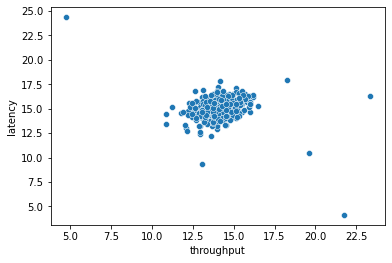

In [4]:
sns.scatterplot(x=X['throughput'], y=X['latency'])

<AxesSubplot:xlabel='throughput', ylabel='Count'>

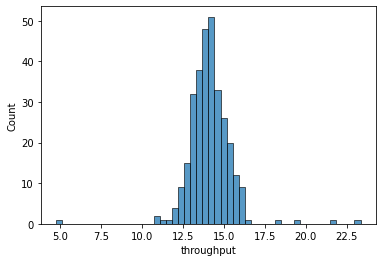

In [5]:
sns.histplot(x=X['throughput'])

<AxesSubplot:xlabel='latency', ylabel='Count'>

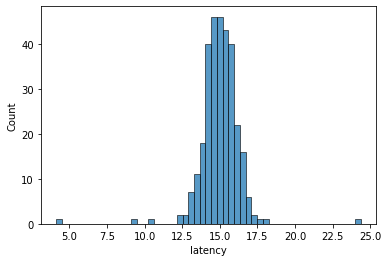

In [6]:
sns.histplot(x=X['latency'])

## Gaussian Distribution   

In [7]:
def estimate_gaussian(X):
    mu = np.array(X.mean())
    sigma = np.array(X.std())

    return mu, sigma

### Correct output

In [8]:
estimate_gaussian(X)

(array([14.11222578, 14.99771051]), array([1.35595738, 1.30970712]))

In [9]:
Xval = data['Xval']
yval = data['yval']

Xval = pd.DataFrame(data=Xval, columns=['throughput', 'latency'])
yval = pd.DataFrame(data=yval, columns=['label'])


In [10]:
# Check if number of Xval data is equal to X shape
Xval.shape == X.shape

True

In [11]:
# TODO: calculate the probability for X data
m, std = estimate_gaussian(X)
pdf_X = stats.norm.pdf(X.head(50), loc = m, scale=std)

Now, we also need to do this for the validation set (using the same model parameters). We'll use these probabilities combined with the true label to determine the optimal probability threshold to assign data points as anomalies. 

In [12]:
pval = np.zeros(Xval.shape)
xval_p = stats.norm.pdf(Xval, loc=m, scale=std)
pval[:, 0] = xval_p[:, 0]
pval[:, 1] = xval_p[:, 1]

## Selecting the threshold

In [13]:
def select_threshold(probs, testData, n=100):
    pmin = np.min(np.min(probs))
    pmax = np.max(np.max(probs))
    possible_thresh = np.linspace(pmin, pmax, num=n)
    best_epsilon = pmin
    best_f1 = 0

    for thr in possible_thresh:
        y = np.logical_and(probs[:, 0] < thr, probs[:, 1] < thr)

        f_score = f1_score(testData, y, average='binary')
        if f_score > best_f1:
            best_epsilon = thr
            best_f1 = f_score
    
    return best_epsilon, best_f1

In [14]:
select_threshold(pval, yval)

(0.1323027961170373, 0.6666666666666666)

# Anomaly detection result

In [15]:
thresh = 0.02545624525
indexes = np.logical_and(pval[:, 0] < thresh, pval[:, 1] < thresh)
# indexes_f2 = np.where(pval[:, 1] < thresh)
# indexes_f1
indexes.shape

(307,)

In [16]:
type(Xval)

pandas.core.frame.DataFrame

In [17]:
Xval.columns

Index(['throughput', 'latency'], dtype='object')

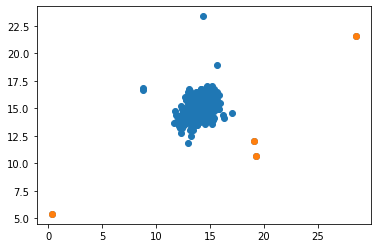

In [18]:
plt.scatter(Xval.throughput, Xval.latency)
plt.scatter(Xval.throughput[indexes], Xval.latency[indexes])
plt.show()

### Anomaly detection result on X dataset

In [19]:
X.columns

Index(['throughput', 'latency'], dtype='object')

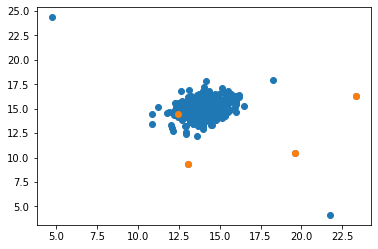

In [20]:
p = stats.norm.pdf(X, loc=m, scale=std)
thresh = 0.02545624525
indexes = np.logical_and(pval[:, 0] < thresh, pval[:, 1] < thresh)
plt.scatter(X.throughput, X.latency)
plt.scatter(X.throughput[indexes], X.latency[indexes])